<a href="https://colab.research.google.com/github/shivanicheela/Bharath-internship/blob/main/covid19_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv("extracted/covid_19_clean_complete.csv")

# Show the first 5 rows
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [5]:
df.info()           # See data types and missing values
df.describe()       # Get basic statistics
df.isnull().sum()   # Count of missing values per column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


,0
Province/State,34404
Country/Region,0
Lat,0
Long,0
Date,0
Confirmed,0
Deaths,0
Recovered,0
Active,0
WHO Region,0


In [7]:
df_india = df[df['Country/Region'] == 'India']
df_india.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
129,NaN,India,20.593684,78.96288,2020-01-22,0,0,0,0,South-East Asia
390,NaN,India,20.593684,78.96288,2020-01-23,0,0,0,0,South-East Asia
651,NaN,India,20.593684,78.96288,2020-01-24,0,0,0,0,South-East Asia
912,NaN,India,20.593684,78.96288,2020-01-25,0,0,0,0,South-East Asia
1173,NaN,India,20.593684,78.96288,2020-01-26,0,0,0,0,South-East Asia


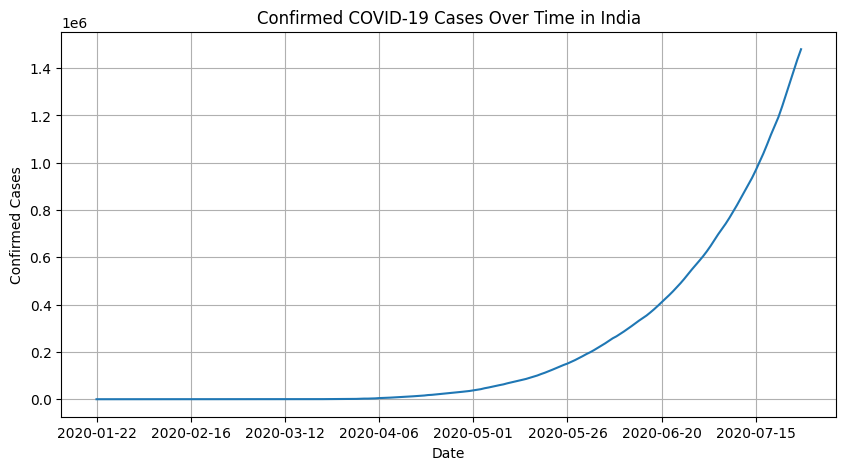

In [8]:
import matplotlib.pyplot as plt

df_india_grouped = df_india.groupby('Date')['Confirmed'].sum()

plt.figure(figsize=(10,5))
df_india_grouped.plot()
plt.title('Confirmed COVID-19 Cases Over Time in India')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.grid(True)
plt.show()

In [9]:
print("Date range:", df['Date'].min(), "to", df['Date'].max())
print("Total countries:", df['Country/Region'].nunique())
print("Missing values:\n", df.isnull().sum())


Date range: 2020-01-22 to 2020-07-27
Total countries: 187
Missing values:
 Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64


<Axes: title={'center': 'COVID-19 Trend in India'}, xlabel='Date'>

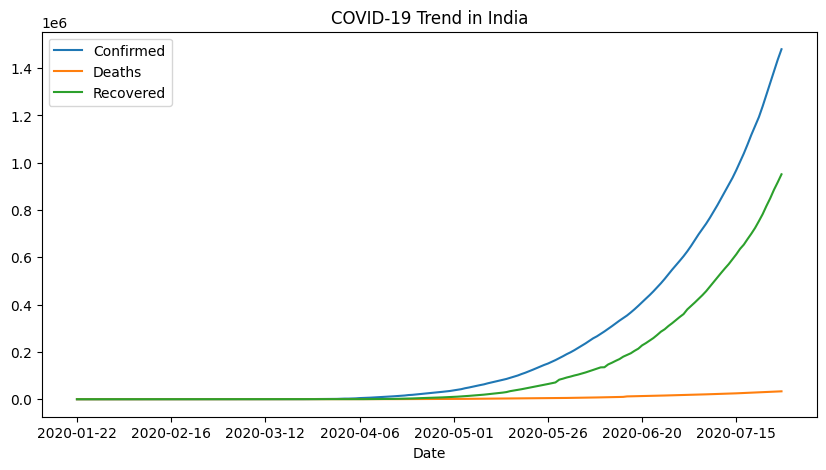

In [10]:
df_india = df[df['Country/Region'] == 'India']
df_india_grouped = df_india.groupby('Date')[['Confirmed', 'Deaths', 'Recovered']].sum()

df_india_grouped.plot(figsize=(10,5), title='COVID-19 Trend in India')

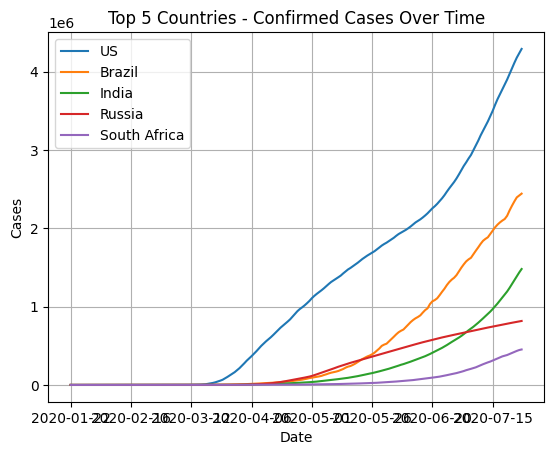

In [11]:
top_countries = df.groupby('Country/Region')['Confirmed'].max().sort_values(ascending=False).head(5).index
for country in top_countries:
    df_country = df[df['Country/Region'] == country]
    df_country.groupby('Date')['Confirmed'].sum().plot(label=country)

plt.legend()
plt.title("Top 5 Countries - Confirmed Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Cases")
plt.grid(True)
plt.show()

In [ ]:
import zipfile
import os

# Unzip the file
with zipfile.ZipFile("archive.zip", 'r') as zip_ref:
    zip_ref.extractall("extracted")

# List the files extracted
os.listdir("extracted")

In [3]:
import zipfile
import os

# Unzip the file
with zipfile.ZipFile("archive.zip", 'r') as zip_ref:
    zip_ref.extractall("extracted")

# List the files extracted
os.listdir("extracted")

['full_grouped.csv',
 'covid_19_clean_complete.csv',
 'worldometer_data.csv',
 'usa_county_wise.csv',
 'day_wise.csv',
 'country_wise_latest.csv']